#  House Price Prediction using Machine Learning

This project predicts house prices using multiple regression models.  
It demonstrates the complete machine learning workflow from data analysis to model evaluation.

Models used:
- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor


## Importing Required Libraries

We import essential libraries for:
- Data handling (Pandas, NumPy)
- Visualization (Matplotlib, Seaborn)
- Model building (Scikit-Learn)


In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

The housing dataset is loaded to analyze house features such as area, bedrooms, bathrooms, and amenities.


In [222]:
df= pd.read_csv('Housing (1).csv')

## Feature Distribution Visualization

Histograms help us understand how numerical features such as area are distributed.


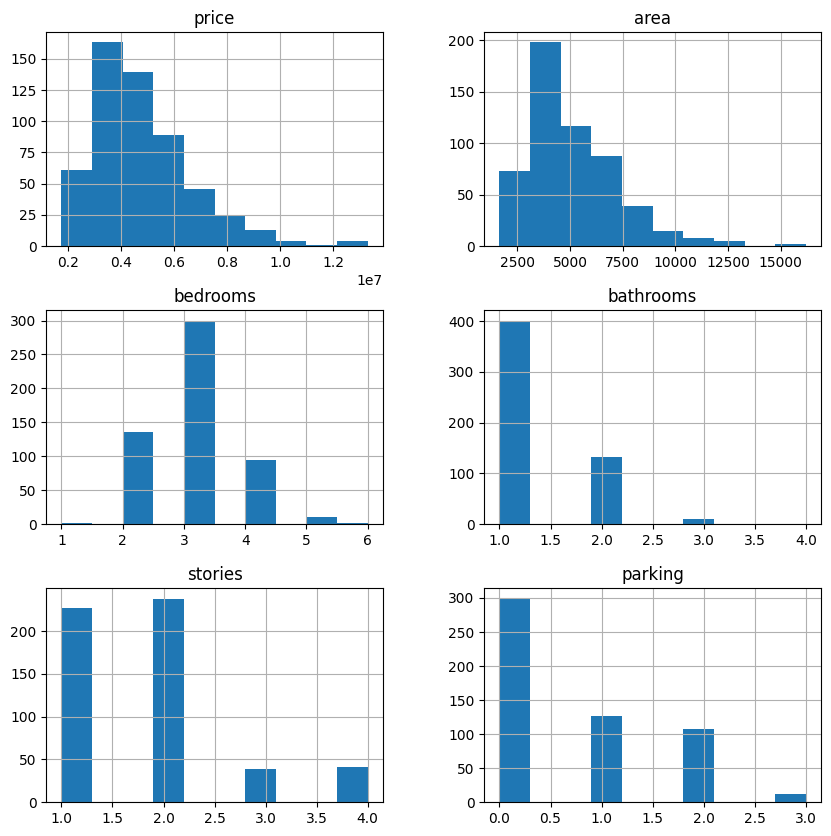

In [223]:
df.hist(figsize=(10,10))
plt.show()

## Understanding the Data

We explore:
- First and last rows
- Dataset shape
- Data types
- Statistical summary

This helps in understanding feature distributions and detecting potential issues.


In [224]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [225]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [226]:
df.shape

(545, 13)

dataset is having 545 rows and 13 columns

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [228]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


##  Missing Values Check
The dataset was checked for missing values. No major missing values were found.


In [229]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


## Encoding Categorical Variables

Machine learning models cannot understand text.  
Categorical features were converted into numerical form using One-Hot Encoding.



In [230]:
df_encoded=pd.get_dummies(df,drop_first=True)

##  Splitting Data into Training and Testing Sets

The dataset is divided so the model can be trained on one portion and tested on unseen data.


In [231]:
X=df_encoded.drop('price', axis=1)
y=df_encoded['price']

In [232]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

## Feature Scaling

Scaling ensures features contribute equally to model training.  
StandardScaler was used for Linear Regression.



In [233]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

## Feature vs Price Relationship

Scatter plots help determine if relationships are linear or complex, guiding model selection.


<Axes: xlabel='area', ylabel='price'>

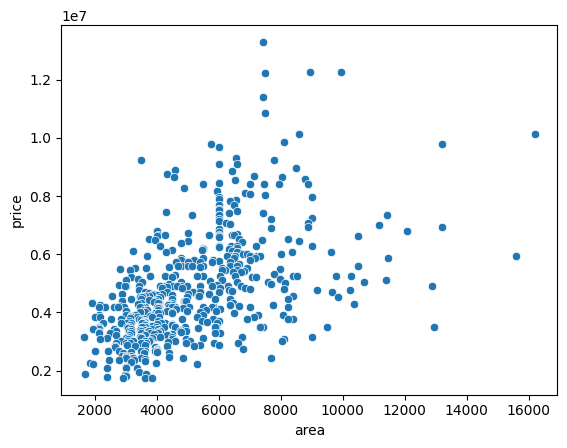

In [234]:
sns.scatterplot(x='area', y='price', data=df)

## Model Training

Three regression models were trained:
- Linear Regression (baseline)
- Decision Tree (non-linear model)
- Random Forest (ensemble method)


In [235]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train_scaled,y_train)
y_pred=regressor.predict(X_test_scaled)

In [236]:
from sklearn.ensemble import RandomForestRegressor
regressor_rfr=RandomForestRegressor(n_estimators=10, random_state=42)
regressor_rfr.fit(X_train, y_train)
y_pred_rfr=regressor_rfr.predict(X_test)

In [237]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt= DecisionTreeRegressor(random_state=42)
regressor_dt.fit(X_train, y_train)
y_pred_dt=regressor_dt.predict(X_test)

## Model Evaluation

Models were evaluated using:
- R² Score
- Mean Squared Error (MSE)
- Mean Absolute Error (MAE)

These metrics measure prediction accuracy.



In [238]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("Linear Regression:")
print('r2_score:',r2_score(y_test,y_pred))
print('MSE:', mean_squared_error(y_test,y_pred))
print('MAE:', mean_absolute_error(y_test,y_pred))

print("Random Forest Regression:")
print('r2_score:', r2_score(y_test, y_pred_rfr))
print('MSE:', mean_squared_error(y_test, y_pred_rfr))
print('MAE:', mean_absolute_error(y_test, y_pred_rfr))

print("Decision Tree Regression:")
print('r2_score:', r2_score(y_test, y_pred_dt))
print('MSE:', mean_squared_error(y_test, y_pred_dt))
print('MAE:', mean_absolute_error(y_test, y_pred_dt))

Linear Regression:
r2_score: 0.6529242642153177
MSE: 1754318687330.6677
MAE: 970043.4039201642
Random Forest Regression:
r2_score: 0.6311353388776826
MSE: 1864452341042.4312
MAE: 1021184.7247706422
Decision Tree Regression:
r2_score: 0.4771459275854347
MSE: 2642802637614.6787
MAE: 1195266.0550458715


## Prediction Visualization

A scatter plot of actual vs predicted prices shows how close the predictions are to real values.


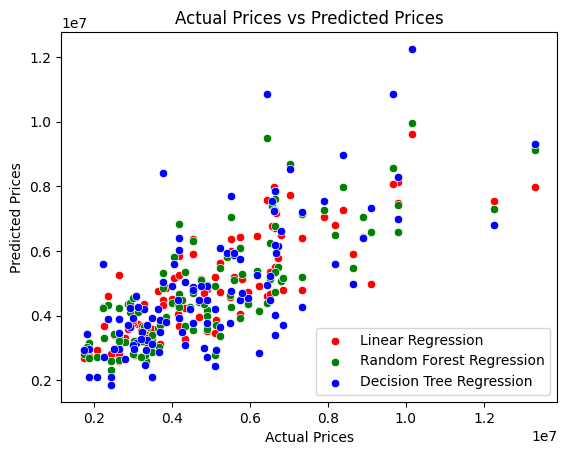

In [240]:
sns.scatterplot(x=y_test, y=y_pred, color='red',label="Linear Regression")
sns.scatterplot(x=y_test, y=y_pred_rfr, color='green',label="Random Forest Regression")
sns.scatterplot(x=y_test, y=y_pred_dt, color='blue',label="Decision Tree Regression")
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.title('Actual Prices vs Predicted Prices')
plt.show()

## Conclusion

Linear Regression performed best due to the mostly linear relationships in the dataset.  
Decision Tree showed overfitting, while Random Forest improved stability but did not outperform Linear Regression.

This project demonstrates model comparison, evaluation, and proper preprocessing.
